In [32]:
#imports
import sys
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2
import math

#checking if everything was imported correctly
print(sys.version)
print(torch.__version__)
print(torchvision.__version__)
print(np.__version__)
print(matplotlib.__version__)
print(cv2.__version__)

3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)]
1.9.1+cpu
0.10.1+cpu
1.21.2
3.4.3
4.5.3


# <center> Q1 

##### Q1. Image load / save. Load the `picket_fence.jpg` image provided. Print the data type of the image, and the data type of the pixels in the image. Print the image dimensions. Is the image accessed by (row,column) or (column,row)? What are the red/green/blue pixel values at (0,0)? In what order are the colors stored? What data type is the image? What data type are the pixels?

## <center> Answers

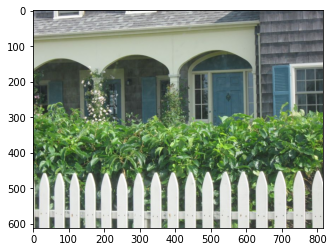

In [334]:
image1=cv2.imread("picket_fence.jpg")  #reading the image
image1=image1[:,:,::-1] #converting RGB to BGR
plt.imshow(image1)

In [336]:
print("Data type of Image is",image1.dtype)
print("Data type of pixels in the image is",image1[0][0].dtype)
print("Dimensions of image are width:{},height:{},depth:{}".format(*image1.shape))

Data type of Image is uint8
Data type of pixels in the image is uint8
Dimensions of image are width:612,height:816,depth:3


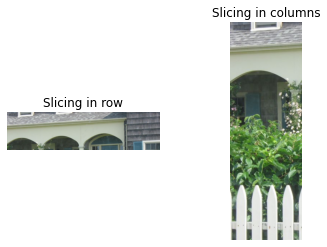

In [337]:
fig,ax=plt.subplots(1,2)

ax[0].set_title("Slicing in row")
ax[0].axis('off')
ax[0].imshow(image1[0:200,:]) #slicing rows


ax[1].set_title("Slicing in columns")
ax[1].axis('off')
ax[1].imshow(image1[:,:200]) #slicing columns

In [36]:
print("Image dimensions (length,width,depth) are", image1.shape)

Image dimensions (length,width,depth) are (612, 816, 3)


The above slicing shows that the images are accessed by row, column

In [338]:
rgbval=image1[0][0]
print('The values at 0,0 are red:{},green:{},blue:{}'.format(*rgbval))

The values at 0,0 are red:129,green:128,blue:126


The colors are sorted in the order Red, Green, Blue (we swapped the image from BGR to RGB in the 1st step for the image to be used with matplotlib)

In [38]:
print("Image data type is",image1.dtype)
print("Image pixels type is",image1[0][0].dtype)

Image data type is uint8
Image pixels type is uint8


# <center> Q2


##### Q2. Color channels. Create a new RGB image by setting the green and blue pixel values to zero everywhere. The resulting image should look red.

## <center> Answers

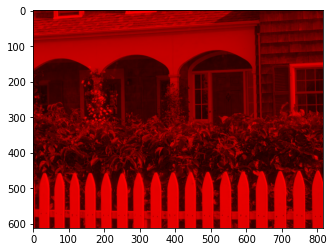

In [39]:
red_image=image1.copy() #deep copying image for not changing the original image
red_image[:,:,1:]=red_image[:,:,1:]*0 #setting all channels except red as 0
plt.imshow(red_image)

# <center> Q3

##### Q3. Photographic negative. Create a new RGB image (from the original image) by subtracting each pixel value from 255. The resulting image should look like a photographic negative.

## <center> Answers

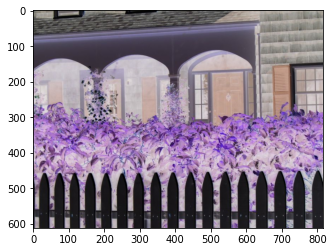

In [40]:
negative_image=255-image1[:,:,:] #subtracting every pixel from 255 to create the negative
plt.imshow(negative_image)

# <center> Q4

##### Q4. Swap color channels. Create a new RGB image (from the original image) by swapping the red and blue channels.

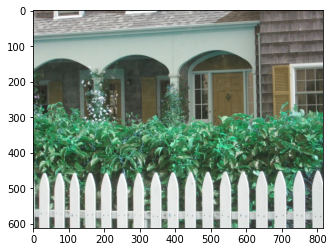

In [41]:
swap_image= image1.copy()
swap_image[:,:,[0,2]]=swap_image[:,:,[2,0]]  #swapping the 1st and 3rd channel, ie the red and blue
plt.imshow(swap_image)

# <center> Q5

##### Q4. Foliage detection. Create a new binary image that contains an `ON` pixel wherever the original input pixel is approximately green, and `OFF` everywhere else. (You will have to think about this a bit, but the solution is not hard.) Below is my output for comparison. What data type is the output image, and what data type are the pixels? Save the image to a `.png` file on disk; load the file in a separate image viewing program to verify that the output looks correct.

I used https://colorpicker.me/#0cf059 to pick green color

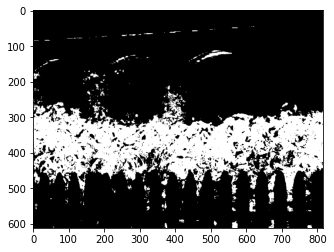

In [42]:
hsv = cv2.cvtColor(image1, cv2.COLOR_BGR2HSV)  #converting the colorspace from RGB to HSV for better color separation
mask=cv2.inRange(hsv, (50, 80, 0), (100, 255,255))  #creating a mask in the HSV colorspace using the color wheel. Played with it a whiel to separate only the green
plt.imshow(mask,cmap='gray')

In [43]:
cv2.imwrite('Mask.jpg',mask) #writing the detected green to a file.

True

# <center> Q6

Q6. Shift. Translate the original image to the right by 200 pixels, and down by 100 pixels. Fill in the
missing values with zero.

In [44]:
shift_x=200 #pixels to be shifted in x direction
shift_y=100 #pixels to be shifted in y direction
affine_translation_matrix=np.float32([
    [1,0,shift_x],
    [0,1,shift_y]
])  #creating an affine transform matrix for the shifting

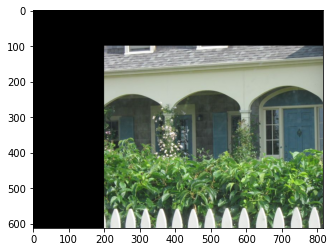

In [45]:
shifted_image=cv2.warpAffine(image1,affine_translation_matrix,(image1.shape[1],image1.shape[0])) #applying affine transform using inbuilt function of opencv
plt.imshow(shifted_image)

# <center> Q7

Q7. Rotate. Rotate the original image clockwise by 90 degrees.

In [46]:
img_center=(int(image1.shape[1]/2),int(image1.shape[0]/2)) #finding the center of the image for rotation
rot_mat = cv2.getRotationMatrix2D( img_center,270, 1 ) #getting rotation matrix from inbuilt opencv function for using affine transform
rot_mat

array([[-1.8369702e-16, -1.0000000e+00,  7.1400000e+02],
       [ 1.0000000e+00, -1.8369702e-16, -1.0200000e+02]])

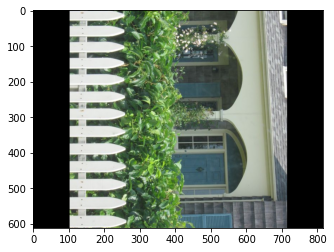

In [47]:

rotated_image=image1.copy()
rotated_image=cv2.warpAffine(rotated_image,rot_mat,(image1.shape[1],image1.shape[0])) #using affine transform for rotation

plt.imshow(rotated_image)

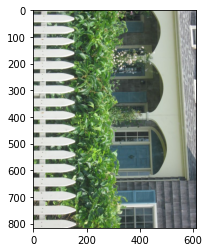

In [48]:
rot_image=cv2.rotate(image1,cv2.ROTATE_90_CLOCKWISE)  #another method of rotating the image using the inbuilt rotation function in opencv
plt.imshow(rot_image)

## 

# <center> Q8

Q8. Similarity transform. Write a function to apply a similarity transform to an input image, yielding
an output image of the same size. The function should take scale, rotation angle, and
translation as input (all as floating point values). Use nearest neighbor interpolation for
simplicity, but be sure to use “inverse mapping” to ensure that every pixel in the output gets
painted. Test this on the original image above by passing the values scale=2.0, theta=45.0
(degrees), shift=[100,100]. (Yes, the order matters here, but the order is up to you, as is the
specific interface of the function.)

In [ ]:
def similarity(image, scale=1, rot_angle=0,shift_x=0,shift_y=0):
    ''' A function for applying similarity transformations on an image. 
        Takes an image, scale, rotation angle, shift in x direction and shift in y direction as inputs
        Returns the transformed image'''
    affine_translation_matrix=np.float32([
    [1,0,shift_x],
    [0,1,shift_y]
    ])    #Defining the affine matrix for simple translation
    rot_mat = cv2.getRotationMatrix2D( img_center,rot_angle, scale )  #defining affine matrix for rotation
    image=cv2.warpAffine(image,affine_translation_matrix,(image.shape[1],image.shape[0])) #applying translation first
    image=cv2.warpAffine(image,rot_mat,(image.shape[1],image.shape[0]))  #applying rotation second on the image
    return image

In [339]:
    rot=float(input("Enter rotation angle: "))
scal=float(input("Enter scaling factor: "))
shift_x=float(input("Enter x shift: "))
shift_y=float(input("Enter y shift: "))
similarity_image=similarity(image=image1,scale=scal,rot_angle=rot,shift_x=shift_x,shift_y=shift_y) #calling the similarity function
plt.imshow(similarity_image)

Enter rotation angle: 


ValueError: could not convert string to float: ''

# <center> Q9

Q8. Grayscale conversion. Look up the most common formula to transform RGB to grayscale. (For
example, look at OpenCV’s cv::COLOR_RGB2GRAY .) Apply this formula to the original
image. Although the result looks reasonable, it is technically not correct. List two reasons why
this common formula is wrong. (Hint: This is explained in the textbook.) To convince yourself
that the common formula is wrong, apply the formula to an image of all pure blue pixels, that is,
(0,0,255). (Extra credit: Implement the correct formula, assuming Rec. 709, and apply it to both
the pure blue image as well as the image above.)

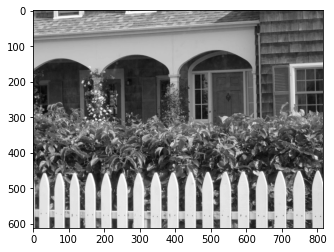

In [51]:
grey_image=cv2.cvtColor(image1,cv2.COLOR_RGB2GRAY) #converting rgb to grey using the inbuilt function in opencv
plt.imshow(grey_image,cmap="gray")

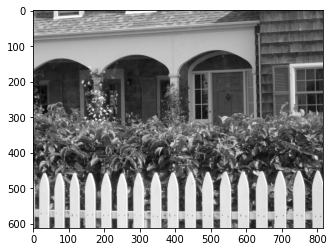

In [52]:
r,g,b=cv2.split(image1)  #splitting the rgb channels in the image
grey_image=0.299*r+0.587*g+0.114*b  #applying the formula used in the rgb2grey function(most popular)
plt.imshow(grey_image,cmap="gray")

The function COLOR_RGB2GREY converts the red, green and blue colors in a specific weightage as below <br>
RGB[A] to Gray:Y←0.299⋅R+0.587⋅G+0.114⋅B<br>

1. This is not correct as this value have been arrived as a result of an experiment involving a number of people and by taking the average of the vision sensitivities of the collection. This might be different for different people. <br>
2. This weightage was created long before displays and is probably invalid now .Also, every display have it's own characteristics. We are not taking the display parameters into consideration when using the given weights.


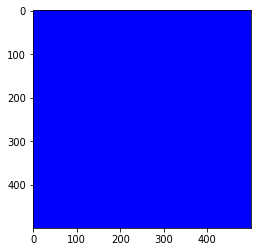

In [53]:
import numpy as np
blue_image= np.zeros([500,500,3],dtype=np.uint8)  #creating a 500x500x3 image with all zeroes
blue_image[:,:,2]=255   #setting the blue channel as high
plt.imshow(blue_image)

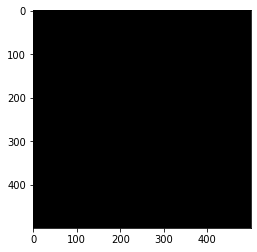

In [341]:
r,g,b=cv2.split(blue_image) #splitting the color channels
blue_grey=0.299*r+0.587*g+0.114*b  #applying the formula used in the rgb2grey function(most popular)
plt.imshow(blue_grey,cmap="gray")

The greyscale image produced is all black. It proves that the color conversion formula is not accurate

# <center> Q10

Q10. Moments. Write a function to compute the first- and second-order moments (both standard
and centralized) of a binary image. Apply the function to the image `glasses_outline.png`. Print
the results.

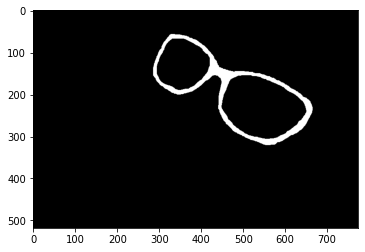

In [382]:
image1=cv2.imread("glasses_outline.png")  #reading the image
image1=image1[:,:,::-1] #converting RGB to BGR
plt.imshow(image1)

In [383]:
def moment(image,p=0,q=0):
    '''function to find the moments. 
        Takes an image, the p and q for finding the moment
        Returns the moment'''
#     threshold=180
    moment=0
    moment_image=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY) #converting to grey image for finding the moment
    xdim=moment_image.shape[0]  #height
    ydim=moment_image.shape[1]  #width
    
    for x in range(0,xdim):
        for y in range(0,ydim):
                                                #commented is an optional code for thresholding the image and converting to binary. Here it is not necessary
#             if moment_image[x][y]>threshold: 
#                 moment_image[x][y]=255
#             else:
#                 moment_image[x][y]=0
            moment=moment+x**p*y**q*moment_image[x][y]/255  #formula for calculating moment
    return moment

In [384]:
#calculating all the moments using the function
#zeroth moment
m00=moment(image1,p=0,q=0)
print("0th order moment m00={}".format(m00))

#first order moments
m10=moment(image1,p=1,q=0)
m01=moment(image1,p=0,q=1)
print("first order moment m01={} and m10={}".format(m01,m10))

#second order moments
m11=moment(image1,p=1,q=1)
m20=moment(image1,p=2,q=0)
m02=moment(image1,p=0,q=2)
print("second order moments m11={} and m20={} and m02={}".format(m11,m20,m02))

0th order moment m00=11792.0
first order moment m01=5617082.0 and m10=2254903.0
second order moments m11=1131815800.0 and m20=490541389.0 and m02=2813565690.0


In [385]:
# calculating 0th order centralized moments 
u00=m00
print("Zeroth order centralized moment u00={}".format(u00))

# calculating 1st order centralized moments 
u01=0
u10=0
print("First order centralized moment u01={} and u10={}".format(u01,u10))

# calculating 2nd order centralized moments 
u11=m11-yc*m10
u20=m20-xc*m10
u02=m02-yc*m01
print("Second order centralized moments u11={} and u20={} and u02={}".format(u11,u20,u02))

Zeroth order centralized moment u00=11792.0
First order centralized moment u01=0 and u10=0
Second order centralized moments u11=57699869.44996619 and u20=59351807.97820556 and u02=137886399.40264606


# <center> Q11

Q11. Binary image processing. Using the function from the previous problem, write a function to
compute the orientation and eccentricity of a binary image. Apply the function to the image
`glasses_outline.png`, and draw an ellipse overlaid on the image showing the “best fitting
ellipse”. Explain two reasons why it is better to store `glasses_outline` as a PNG file rather than
a JPEG. (Hint: This is explained in the textbook, but you can also discover the answer on your
own if you save the image as a JPEG and compare the resulting files.)

In [396]:
def orientation_eccentricity(u11,u02,u20):
    ''' Inputs 2nd order moments
        Returns orientation and eccentricity
        '''
    theta=math.atan(2*u11/(u20-u02))/2 #finding orientation angle using formula
    print("Orientation theta is :{} ".format(theta))

    eccentricity=math.sqrt(2*math.sqrt((u20-u02)**2+4*u11**2)/(u20+u02+math.sqrt((u20-u02)**2+4*u11**2))) #using formula
    print("Eccentricity is :{}".format(eccentricity))
    
    return theta, eccentricity

In [398]:
theta, eccentricity=orientation_eccentricity(u11,u02,u20)

Orientation theta is :-0.48662391090035356 
Eccentricity is :0.910407886930469


In [387]:
#finding orientation using the formula  
P=np.float32([[math.cos(theta) , -math.sin(theta)],[math.sin(theta),math.cos(theta)]]) #using formula
P

array([[ 0.8839167 ,  0.46764436],
       [-0.46764436,  0.8839167 ]], dtype=float32)

In [388]:
#finding the centroid using formula
xc=m10/m00
yc=m01/m00

In [389]:
#finding the covarience matrix using formula

covar_matrix=1/u00*np.float32([[u20,u11],[u11,u02]])
covar_matrix

array([[ 5033.2266,  4893.1367],
       [ 4893.1367, 11693.216 ]], dtype=float32)

In [390]:
#finding eigen vector using the formula 
lamda=np.matmul(np.transpose(P),covar_matrix)
lamda=np.matmul(lamda,P)

lamda

array([[ 2.4444670e+03, -1.6641067e-04],
       [ 5.7038676e-05,  1.4281975e+04]], dtype=float32)

We can see that the off diagonal elements are almost zero

In [391]:
max_lambda=np.amax(lamda)
min_lamda=lamda[0,0]

# finding a and b from formula 
a=4*math.sqrt(max_lambda)
b=4*math.sqrt(min_lamda)
print("a:{}, b:{}".format(a,b))

a:478.0288628838221, b:197.76620706341618


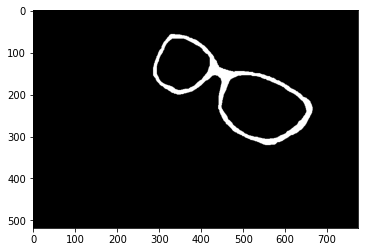

In [393]:
image1=cv2.imread("glasses_outline.png")  #reading the image
image1=image1[:,:,::-1] #converting RGB to BGR
image1=cv2.cvtColor(image1,cv2.COLOR_RGB2GRAY)
plt.imshow(image1,cmap="gray") 

In [ ]:
#We are trying to fit an ellipse on the glasses. We have a,b,axis , but we need the center of ellipse now.
# Initial approach is to find the farthest points in the width direction and height direction
# The assumption is that the farthest points of the object of interest in the image would be on the ellipse 

In [394]:
smallx=255  #initializing least x as max value
largex=0    #initializing max y as max value
smally=255  #initializing least y as max value
largey=0    #initializing max y as max value
xdim=image1.shape[0]
ydim=image1.shape[1]
for x in range(0,xdim):
    for y in range(0,ydim):
        #finding the farthest points in the width and height directions
        if image1[x,y]>250:
            if x<smallx:
                smallx=x   
            if x>largex:
                largex=x
            if y<smally:
                smally=y
            if y>largey:
                largey=y
center=(smally+(largey-smally)/2,smallx+(largex-smallx)/2)

center     

(460.0, 188.5)

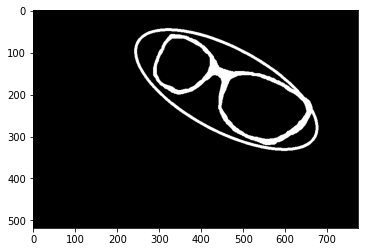

In [404]:
color = (0, 0, 255) #setting color as blue
thickness = 5  #setting thickness
angle = theta
axesLength = (a, b)
center_coordinates = center
window_name = 'Image'

# cv2.ellipse(image1, center_coordinates, axesLength ,angle, startAngle, endAngle, color, thickness)
img=cv2.ellipse(image1, (center_coordinates, axesLength, math.degrees(-theta)), (255, 0, 255), 5); #plotting ellipse with a,b,theta and center
plt.imshow(img,cmap="gray")

My 2nd approach is to find the contour usign the inbuilt function and getting the ellipse center using the function

In [406]:
contours, hierarchy  = cv2.findContours(image1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
ellipse=cv2.fitEllipse(contours[0])
center=ellipse[0]
center

(460.31317138671875, 188.60821533203125)

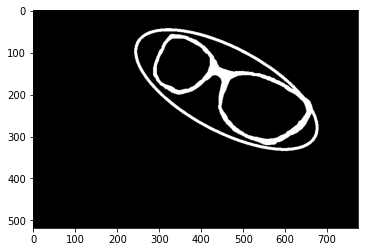

In [407]:
color = (0, 0, 255)
thickness = 5
startAngle = 0
endAngle = 360
angle = theta
axesLength = (a, b)
center_coordinates = center
window_name = 'Image'

# cv2.ellipse(image1, center_coordinates, axesLength ,angle, startAngle, endAngle, color, thickness)
img=cv2.ellipse(image1, (center_coordinates, axesLength, math.degrees(-theta)), (255, 0, 255), 5);
plt.imshow(img,cmap="gray")

We can see that both the approaches created similar ellipses.

In [411]:
cv2.imwrite('ellipse.png',img) #writing the ellipse overlapped image to a file.

True

PNG is better than JPEG because <br>
1. PNG uses loseless compression whereas jpg uses lossy compression. That means information is lost when jpg images are stored and can create artifacts upon scaling.
2. PNG supports transparency but JPG doesnot support transparency.
